# IBM HR Attrition

Attrition: When an employee leaves the company due to resignation or retirement, then it is called Attrition. Employees leave the company for personal and professional reasons like retirement, lower growth potential, lower work satisfaction, lower pay rate, bad work environment, etc. Attrition is part and parcel of any business. Attrition is a cause of concern when it crosses a limit.

The attrition rate, also known as churn rate, can be defined as the rate at which employees leave an organization from a specific group over a particular period of time.

The dataset for the analysis is taken from Kaggle. To get insights about what factors contribute to employee attrition, we use Python and libraries like pandas, matplotlib, and seaborn. In this blog, we mostly talk about absolute and percentage values.

In [1]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling data
HR_data=pd.read_csv("IBM HR Data new.csv")
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [3]:
#basic informations
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [ ]:
HR_data.dtypes

The data types are float and object.

In [ ]:
#shape
HR_data.shape

There are 23436 rows and 37 columns

In [ ]:
#features & target
HR_data.columns

In all we have 36 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Voluntary resignation or Currently working.

In [ ]:
#numerical columns
num_cols=[features for features in HR_data.columns if HR_data[features].dtypes !='O']
num_cols

In [ ]:
#categorical columns
cat_cols=HR_data.select_dtypes(include='object')
cat_cols.columns

There are 25 numerical columns and 12 categorical columns.

In [ ]:
HR_data.nunique()

In [ ]:
HR_data=HR_data.drop(['EmployeeNumber'],axis=1)

In [ ]:
HR_data=HR_data.drop(['Application ID'],axis=1)

In [ ]:
HR_data.head()

In [ ]:
HR_data.describe().T

In [ ]:
#null values
HR_data.isna().sum()

In [ ]:
#null value percentage
Nullvalue_percentage=(HR_data.isna().sum()/len(HR_data))*100
Nullvalue_percentage

In [ ]:
Total_nullvalue_percentage=Nullvalue_percentage.sum()
Total_nullvalue_percentage



The total percentage of null values present in the dataset is 1.5%.

In [ ]:
#histogram for numerical features
HR_data.hist(figsize=(18, 14))

# Inference from histogram
1)The age graph is almost normally distibuted.The minimum & maximum age of workforce is 18 & 60.Most of the employees are in between the age group 30-40.
2)The daily rate is between 100 and 1500.
3)Majority of the employees living space distance from company is less than 10km.
4)Most of the employees education level is 3.
5)The higest rating for the environment satisfaction is 3 & 4.
6)The hourly rate is between 20-100.
7)The higest rating for job involvement is 3.
8)Majority of the employees joblevel is 1 & 2.
9)3 & 4 has the higest rating for job satisfaction.
10)Monthly salary is between 1000-20000.
11)Major number of employees worked for more than one company before joining IBM.
12)Many of them have salary hike percentage less than 15%.
13)3 is the highest performance rating of employees.
14)Most of the employees relationship satisfaction rating is 3 & 4.
15)The satandared working hours of employees is 80hr.
16)Only few employees have taken stock option plan.
17)Most of the employees working years is 20 and below.
18)Many employees got 2 time training for last year.
19)3 is the higest rating for work life balance.
20)Many of the employees are working for IBM for less than 13 years.
21)Emloyees are working in the current role for less than 10 years.
22)Majority of them got promotions & working with the current manager.

In [ ]:
#outlier visualization 
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

Some columns in the dataset contain outliers.It will be handelled during data pre-processing.

# Exploratory Data Visualization

# Univariate Visualization

# Target Column

In [ ]:
#count plot of target.
sns.countplot(x='Attrition', data=HR_data)

In [ ]:
#pie chart
plt.rcParams['figure.figsize'] =5,5
labels = HR_data['Attrition'].value_counts().index.tolist()
sizes = HR_data['Attrition'].value_counts().tolist()
explode = (0, 0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

# Inference
The figure showing is the figure of employee attrition. In this dataset, 3709 employees left the company while 19714 stay(ie only 15.8% of the employees left, rest are still working in IBM).The data is very imbalanced.

# Visualization for Numerical Features

# Age

In [ ]:
#distplot of Age column
plt.figure(figsize=[10,8])
sns.distplot(HR_data['Age'],hist=True,kde=True,color='k',bins=10)

# Inference
The graph is normally distributed.
The minimum age of workforce is 18.
The maximum age of workforce is 60.
Majority of the employees lie between the age range 30-40.

# distplot of all numerical features

In [ ]:
fig,ax = plt.subplots(6,4, figsize=(12,12))                
sns.distplot(HR_data['DailyRate'], ax = ax[0,0]) 
sns.distplot(HR_data['DistanceFromHome'], ax = ax[0,1]) 
sns.distplot(HR_data['Education'], ax = ax[0,2]) 
sns.distplot(HR_data['EmployeeCount'], ax = ax[0,3]) 
sns.distplot(HR_data['EnvironmentSatisfaction'], ax = ax[1,0]) 
sns.distplot(HR_data['HourlyRate'], ax = ax[1,1]) 
sns.distplot(HR_data['JobInvolvement'], ax = ax[1,2]) 
sns.distplot(HR_data['JobLevel'], ax = ax[1,3]) 
sns.distplot(HR_data['JobSatisfaction'], ax = ax[2,0]) 
sns.distplot(HR_data['MonthlyIncome'], ax = ax[2,1])
sns.distplot(HR_data['MonthlyRate'], ax = ax[2,2])
sns.distplot(HR_data['NumCompaniesWorked'], ax = ax[2,3])
sns.distplot(HR_data['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(HR_data['PerformanceRating'], ax = ax[3,1])
sns.distplot(HR_data['RelationshipSatisfaction'], ax = ax[3,2])
sns.distplot(HR_data['StandardHours'], ax = ax[3,3])
sns.distplot(HR_data['StockOptionLevel'], ax = ax[4,0])
sns.distplot(HR_data['TotalWorkingYears'], ax = ax[4,1])
sns.distplot(HR_data['TrainingTimesLastYear'], ax = ax[4,2])
sns.distplot(HR_data['WorkLifeBalance'], ax = ax[4,3])
sns.distplot(HR_data['YearsAtCompany'], ax = ax[5,0])
sns.distplot(HR_data['YearsInCurrentRole'], ax = ax[5,1])
sns.distplot(HR_data['YearsSinceLastPromotion'], ax = ax[5,2])
sns.distplot(HR_data['YearsWithCurrManager'], ax = ax[5,3])
plt.tight_layout()
plt.show()

# Inference
Using distplot we find out the distribution of all numerical features.Here we can see that EmployeeCount and StandardHours are not continues.

# Distance from home

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['DistanceFromHome'])

# Inference
From this graph we can see that around 3400 employees live near to the company,ie within 1 or 2km.

# Education

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Education'])

# Inference
This feature have five levels.They are:
1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'.
Many employees have Bachelors level of education.

# Environment satisfaction

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EnvironmentSatisfaction'])

# Inference
It is the satisfaction of the employee with the working environment.This has four levels:
    1:'Low',2:'Medium',3:'High',4:'Very High'
around 7200 employees vote for level 3 & 4 ie they are satisfied with the working environment.Rest of them vote for level 1 & 2                    

# Hourly rate

In [ ]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['HourlyRate'])

Hourly rate is between 20 to 100.

# Job involvement

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobInvolvement'])

# Inference
It contains four level.They are:
     1:'Low',2:'Medium',3:'High',4:'Very High'
Around 13900 are voting for level 3,ie they are highly involved in their job.                        

# Job level

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobLevel'])

# Inference
It's the position of employees in the company.Around 8700 employees are at 1st and 2nd level.

# Job satisfaction

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobSatisfaction'])

# Inference
It is the satisfaction level of employees in their job.There are four level:
    1:'Low',2:'Medium',3:'High',4:'Very High'
Around 14400 employees are satisfied in their job, ie are voting 3 & 4.                    

# Monthly income

In [ ]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MonthlyIncome'])

# Number of companies worked

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['NumCompaniesWorked'])

# Inference
The number of companies in which the emloyees worked before they joined IBM.Different employees worked for nine different companies.Around 8320 employees worked for only 1 company before joining IBM.

# Percentage salary hike

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PercentSalaryHike'])

# Inference
It's the percentage of salary hike.The many employees got upto 14% of salary hike every year.

# Performance rating

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PerformanceRating'])

# Inference
It's the performance of the employee in the company.
1:'Low',2:'Good',3:'Excellent',4:'Outstanding'
All the employees have performance rating 3 and 4,ie all are performing their maximum                

# Relationship satisfaction

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['RelationshipSatisfaction'])

# Inference
Contain four levels.
1:'Low',2:'Medium',3:'High',4:'Very High'
Many of them are rating 3 & 4.                

# Stock option level

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['StockOptionLevel'])

# Inference
Stock option plan is an employee benefit plan isssued by the company to encourage employee ownership in the company.


# Total working years

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TotalWorkingYears'])

# Inference
Many employees are working for many years.The employees working for 10 years has the higest count.

# Training times last year

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TrainingTimesLastYear'])

# Inference
How much time does the employee got training for last year.
Most of them got 2 to 3 time.

# Work life balance

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['WorkLifeBalance'])

# Inference 
It's the rating given by employees that how their work and personal life is balanced.
It has four level;1:'Low',2:'Good',3:'Better',4:'Best'
 Many of them are rating as 3.               

# Years at company

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsAtCompany'])

# Inference
How many years in which the employee is working for IBM.
Most of the employees are working for less than 11 years.

# Years in current role

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsInCurrentRole'])

# Inference
The higest count is for 2 years.

# Years since last promotion

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsSinceLastPromotion'])

# Inference
It's the years passed since their last promotion.
The higest count is for 0 years.

# Years with current manager

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsWithCurrManager'])

# Inference
The higest count for working in IBM with current manager is for 2 years.

# Visualization for Categorical Features

# Business travel

In [ ]:
sns.countplot(x='BusinessTravel', data=HR_data)

# Inference
Majority of the employees belong to travel rarely group. This indicates that most of them did not have a job which asked them for frequent travelling.

# Department

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Department'])

# Inference
Major employees work under Research & Development department.

# Education field

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EducationField'])

# Inference
Most of the employees education field are Life science and Medical.

# Gender

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Gender'])

# Inference
Majority of the employees working in IBM are males.

# Job role

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobRole'])

# Inference
Major job roles of the employees are Sales executive,Research scientist and Laboratory technician.

# Marital status

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MaritalStatus'])

# Inference
Most of the employees are married.

# Over 18

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Over18'])

# Inference 
All the employees working in the company are above the age of 18.

# Over time

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['OverTime'])

# Inference
Only around 29% of the employees are working over time.

# Employee source

In [ ]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Employee Source'])

# Inference
The major source of employees are from company website.

# Cor-relation between features

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
corr = HR_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [ ]:
#cor-relation in percentage values
corr=HR_data.corr()
import  seaborn as sns 
plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

# Inference
From the correlation table we see that monthly income is highly correlated with job level as expected as senior employees will definately earn more. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.Employee count and Standard hours also does not have any effect.

SOME OTHER INFERENCES FROM THE ABOVE HEATMAP:
1)Job level and total working years are highly correlated which is expected as senior employees must have worked for a larger span of time
2)Monthly Income and total working years are highly correlated which is expected as the employee with more work experince will earn more salary.
3)Years in current role and years at company are highly correlated.
4)Years with current manager and years at company are highly correlated.
5)Self relation ie of a feature to itself is equal to 1 as expected.

# Bivariate Visulaization

# Plotting the Features against the 'Target' variable.

# Age vs Attririon

In [ ]:
sns.factorplot(data=HR_data,y='Age',x='Attrition',aspect=1,kind='bar')

# Inference
This graph shows that younger age group are leaving the company(ie below 35) and that the people with higher age have lesser tendency to leave the company which makes sense as they may have settled in the organisation.

# Bussines travel vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='BusinessTravel')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.BusinessTravel],margins=True,normalize='index')

# Inference
The employees who travel frequently have higher percentage(24%) of leaving the company. 

# Department vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Department')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Department],margins=True,normalize='index')

# Inference
The higest percentage of voluntary resignation happens in sales department(20%).They may be leaving the company due to reasons like greater workfoce,lower salary,etc.
The currently working employee percent is higher in research & development department(86%).

# Distance from home vs Attrition

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x='DistanceFromHome',hue='Attrition',data=HR_data)
plt.show()

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.DistanceFromHome],margins=True,normalize='index')

# Inference
The employees with greater distance are leaving company.

# Education vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Education')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Education],margins=True,normalize='index')

# Inference
From this graph we can observe that the employees with education level 1 have the higher percentage(18%) of voluntary resignation(ie they are leaving the company)

# Education field vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EducationField')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EducationField],margins=True,normalize='index')

# Inference
The employees having technical degree have higher ratio(22%) of voluntary resignation.The employee with life science as the education field have lesser chance of leaving the company.

# Environment satisfaction vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EnvironmentSatisfaction')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EnvironmentSatisfaction],margins=True,normalize='index')

# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of environment satisfacftion.This means that they are satisfied with their working environment.

# Gender vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Gender')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Gender],margins=True,normalize='index')

# Inference
About 85 % of females want to stay in the company while only 15 % want to leave. All in all 84 % of employees want to be in the company with only being 16% wanting to leave the company.

# Job involvement vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobInvolvement')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobInvolvement],margins=True,normalize='index')

# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of job involvement.This means that they are doing  their maximum.

# Job level vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobLevel')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobLevel],margins=True,normalize='index')

# Inference
There is a higher rate of voluntary resignation in employees having job level 1(20%).

# Job role vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobRole')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobRole],margins=True,normalize='index')

# Inference
The lower ratio of voluntary resignation happens in manager role.The higher is in sales representatives,this may due to workforce,low salary,etc.

# Job satisfaction vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobSatisfaction')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobSatisfaction],margins=True,normalize='index')

# Inference
 Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of voluntary resignation which is quite obvious as highly contented workers will obvioulsy not like to leave the company.

# Marital status vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='MaritalStatus')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.MaritalStatus],margins=True,normalize='index')

# Inference
Single peopel are more likely to quit compared to married and divorced people.

# Over time vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='OverTime')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.OverTime],margins=True,normalize='index')

# Inference
The over time working employees are more likely to quit.

# Performance rating vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='PerformanceRating')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.PerformanceRating],margins=True,normalize='index')

# Inference
Attrition ratio for both performance level is equal .

# Relationship satisfaction vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='RelationshipSatisfaction')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.RelationshipSatisfaction],margins=True,normalize='index')

# Inference
The lower ratio of voluntary resignation is with level 2.

# Stock option level vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='StockOptionLevel')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.StockOptionLevel],margins=True,normalize='index')

# Inference
The level 0 has higher ratio of voluntary resignation.

# Training times last year vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='TrainingTimesLastYear')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.TrainingTimesLastYear],margins=True,normalize='index')

# Inference
The employees who does not get any training during last year are most likely to resing.

# Work life balance vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='WorkLifeBalance')

In [ ]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.WorkLifeBalance],margins=True,normalize='index')

# Inference
The lower rating employees are likely to quit the company.They have bad level of work-life balance.

# Employee Source vs Attrition

In [ ]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Employee Source')

# Inference
The higest ratio of voluntary resignation is by employees who have  entered by referal(20%).

# Age vs Joblevel

In [ ]:
sns.factorplot(x = 'Age', y='JobLevel', kind = 'bar', data=HR_data, aspect = 3)

In [ ]:
pd.crosstab(columns=[HR_data.JobLevel],index=[HR_data.Age],margins=True,normalize='index')

# Inference
Younger age group employees (ie between 18 to 28)are in job level 1.

In [ ]:
sns.scatterplot(data=HR_data,x='JobLevel',y='MonthlyIncome')
plt.title("Job level vs Monthly income")  

#Plotting Age vs monthly income
plt.figure(figsize = (12,4))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data =HR_data,color='lightseagreen')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'PerformanceRating', y = 'PercentSalaryHike' , data = HR_data)
plt.show()

In [ ]:
HR_data.groupby(['PerformanceRating'])['PercentSalaryHike'].mean().to_frame()

# Inference
There is a linear relationship between performance rating and percentage salary hike.
The employees with performance rating 4 has 18% salary hike.

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'Age',y = 'Education',data = HR_data)
plt.show()

In [ ]:
HR_data.groupby(['Education'])['Age'].mean().to_frame()

# Multivariate Visualization

# Gender & Monthly income vs Attrition

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="MonthlyIncome", data=HR_data,hue='Attrition',palette='GnBu')

In [ ]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

In [ ]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

# Inference
Monthly income rate of male and female for attrition is almost same .

# Gender & Age vs Attrition

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="Age", data=HR_data,hue='Attrition',palette='GnBu')

In [ ]:
HR_data.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

In [ ]:
HR_data.groupby(['Gender','Attrition'])['Age'].median().to_frame()

# Inference
The attrition age for both the genders are equal.

From these we can conclude that gender does not have much effect in employee attrition.

# Department & Distance from home vs Attrition

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot( x="Department", y='DistanceFromHome',data=HR_data,hue='Attrition',palette='GnBu')

In [ ]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].mean().to_frame()

In [ ]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].median().to_frame()

# Inference
The employees whoes distance from home is large is leaving the company.

# Age & Monthly income vs Attrition

In [ ]:
plt.figure(figsize = (16,6))
sns.jointplot(x='Age',y='MonthlyIncome',data=HR_data,hue='Attrition')
plt.show()

In [ ]:
HR_data.groupby(['Attrition'])['Age'].mean().to_frame()

In [ ]:
HR_data.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

# Inference
Younger age employees with lower salary is leaving the company.

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='BusinessTravel',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')

In [ ]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].mean().to_frame()

In [ ]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].median().to_frame()

In [ ]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')
plt.show()

In [ ]:
HR_data.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].mean().to_frame()

In [ ]:
plt.subplots(figsize=(10,5))

sns.swarmplot(x='MaritalStatus',
             y='Age',
             data=HR_data,
             hue='Attrition',
             size=8)
plt.show()

In [ ]:
HR_data.groupby(['MaritalStatus','Attrition'])['Age'].mean().to_frame()

In [ ]:
plt.subplots(figsize=(10,5))
sns.swarmplot(x='MaritalStatus',
             y='MonthlyIncome',
             data=HR_data,
             hue='Attrition',
             size=8)
plt.show()

In [ ]:
HR_data.groupby(['MaritalStatus','Attrition'])['MonthlyIncome'].mean().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot( x="JobLevel", y='YearsAtCompany',data=HR_data,hue='Attrition',size=7)

In [ ]:
HR_data.groupby(['JobLevel','Attrition'])['YearsAtCompany'].median().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot( x="EducationField", y='PerformanceRating',data=HR_data,hue='Attrition',palette='GnBu')

In [ ]:
HR_data.groupby(['EducationField','Attrition'])['PerformanceRating'].mean().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot( x="Education", y='PerformanceRating',data=HR_data,hue='Attrition')

In [ ]:
HR_data.groupby(['Education','Attrition'])['PerformanceRating'].mean().to_frame()

In [ ]:
plt.figure(figsize=(15,7))
sns.swarmplot( x="Department", y='MonthlyIncome',data=HR_data,hue='Attrition')

In [ ]:
HR_data.groupby(['Department','Attrition'])['MonthlyIncome'].mean().to_frame()

# Data preprocessing

# Moving “Attrition” column to last

In [4]:
HR_data["attrition"] = HR_data["Attrition"]
HR_data.drop(columns = ["Attrition"], inplace = True)

In [5]:
HR_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,attrition
0,41.0,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,...,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,Voluntary Resignation
1,41.0,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,...,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,Voluntary Resignation
2,41.0,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,...,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,Voluntary Resignation
3,41.0,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,...,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,Voluntary Resignation
4,41.0,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,...,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,Voluntary Resignation


# Handling null values of the HR_data

In [6]:
HR_data.isnull().sum()

Age                          3
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtCompany              13
YearsInC

Before filling the null values we have to check the outliers

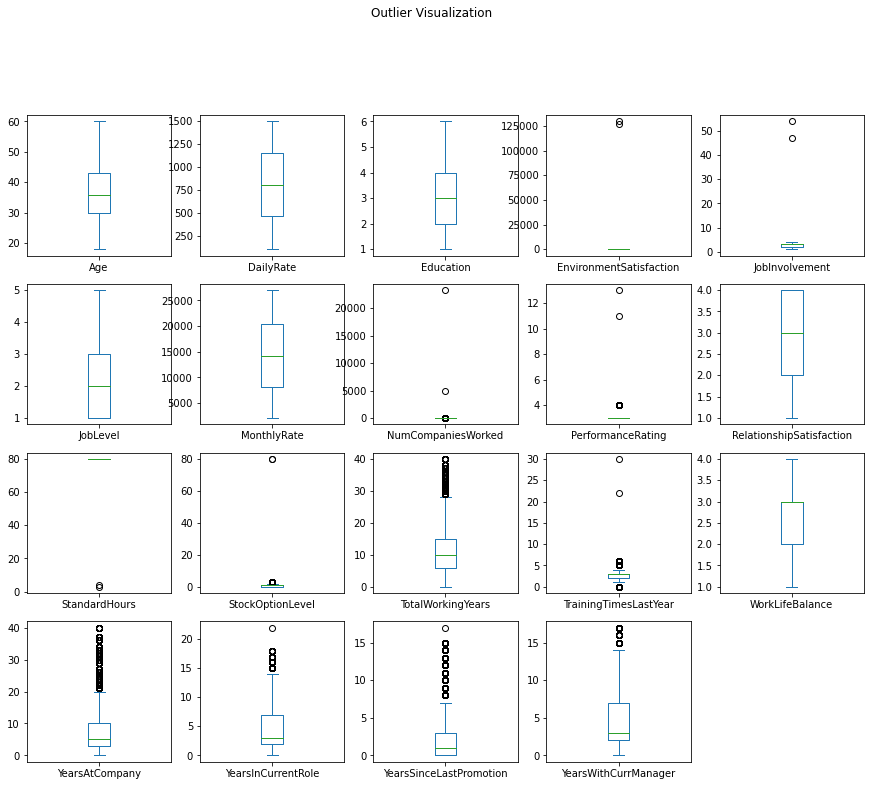

In [7]:
#outlier visualization 
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

In [8]:
HR_data.dtypes

Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [9]:
HR_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'Application ID', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source', 'attrition'],
      dtype='object')

Features 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobInvolvement','PerformanceRating','StandardHours','StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear''YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager' are having outliers so filling vaues in these features using median 

In [10]:

for i in ['EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobInvolvement','PerformanceRating','StandardHours','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    HR_data[i]=HR_data[i].fillna(HR_data[i].median())

Features 'Age','DailyRate','Education','JobLevel','MonthlyRate','WorkLifeBalance','RelationshipSatisfaction' doesn't have outliers,so filling missing values using mean

In [11]:
for i in ['Age','DailyRate','Education','JobLevel','MonthlyRate','WorkLifeBalance','RelationshipSatisfaction']:
     HR_data[i]=HR_data[i].fillna(HR_data[i].mean()) 

features BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Application ID,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,Over18,OverTime, PercentSalaryHike,Employee Source,attrition are categorial datas,so we are filling values in these features using mode

In [14]:
for i in ["BusinessTravel","Department","DistanceFromHome","EducationField","EmployeeCount","Gender","HourlyRate","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","Over18","OverTime","PercentSalaryHike","Employee Source","attrition"]:
    HR_data[i]=HR_data[i].fillna(HR_data[i].mode())

In [15]:
HR_data.isnull().sum()

Age                          0
BusinessTravel               8
DailyRate                    0
Department                  11
DistanceFromHome             9
Education                    0
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      0
Gender                      10
HourlyRate                   9
JobInvolvement               0
JobLevel                     0
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                  0
NumCompaniesWorked           0
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

# 4 ) Preparing Dataset

Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

# 4.1 ) Feature Encoding

I have used the Label Encoder from the scikit library to encode all the categorical features.

In [ ]:
def transform(feature):
    le=LabelEncoder()
    HR_data[feature]=le.fit_transform(HR_data[feature])
    print(le.classes_)
    

In [ ]:
cat_HR_data=data.select_dtypes(include='object')
cat_HR_data.columns

In [ ]:
for col in cat_HR_data.columns:
    transform(col)

In [ ]:
HR_data.head() 

# 4.2 ) Feature Scaling

The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below I have used the StandardScaler to scale the data.

In [ ]:
scaler=StandardScaler()
scaled_HR_data=scaler.fit_transform(HR_data.drop('attrition',axis=1))
X=scaled_HR_data
Y=HR_data['attrition'].as_matrix()

# 4.3 ) One Hot Encoding the Target

In [ ]:
Y=to_categorical(Y)
Y